# Convolución
### ACUS099 - Procesamiento Digital de Señales

##### Integrante: Nicolás Montes

##### Docente: Victor Poblete

##### Ayudantes: Diego Espejo y Esteban Vargas

## Introducción:

En el siguiente notebook, se analizará el proceso de convolución a través del lenguaje de programación Python, utilizando la plataforma Miniconda junto con Jupyter Notebook y las librerías NumPy y matPlot, las cuales son declaradas a continuación:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Función Convolución:

Definase convolución como la siguiente ecuación matemática:

\begin{equation}
y[n] = \sum_{n={-\infty}}^{\infty}x[k]\cdot h[n-k]
\end{equation}

Sea entonces creada una función Convolucion(x, h), la cual retorna una variable "y" del mismo tamaño que la mayor de las dos funciones entregadas:

In [2]:
def Convolucion(x, h):
    N = max(int(len(x)/2),int(len(h)/2))
    y = np.linspace(-N, N, 2 * N + 1)
    newX = np.linspace(-N, N, 2 * N + 1)
    newH = np.linspace(-N, N, 2 * N + 1)
    for i, j in enumerate(x):
            newX[i] = x[i]
    for i, j in enumerate(h):
            newH[i] = h[i]
    for i, j in enumerate(y):
            y[i] = 0
    for i, j in enumerate(y):
        rango = i + 1
        for k in range(rango):
            resta = i-k
            y[i] += newH[resta]*newX[k]
    return(y)

Luego, se definen las variables a utilizar en el experimento con Python:

In [3]:
N = 20
n = np.linspace(-N, N, 2 * N + 1)
n2 = np.linspace(-N, N, 2 * N + 1)
n3 = np.linspace(-N, N, 2 * N + 1)
h = np.zeros(len(n), dtype = int)
t = np.linspace(-N, N, 2 * N + 1)
alpha1 = 0.8
sig1 = np.power(alpha1,t)
k = -N+1
k2 = 0-int(N/2)
k3 = 0
x = np.zeros(len(n))
h = np.zeros(len(n2))

Se usará de ejemplo una función "escalón unitario" limitada por tramos, para la variable "x":

<StemContainer object of 3 artists>

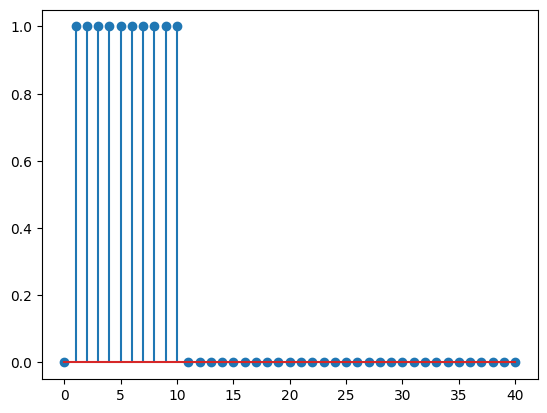

In [4]:
for i, j in enumerate(n):
    if j >= k:
        x[i] = 1
for i, j in enumerate(n):
    if j > k2:
        x[i] = 0
plt.stem(x)

Para la variable "h", se usará la siguiente ecuación:

\begin{equation}
a^n
\end{equation}
con
\begin{equation}
a = 0.8
\end{equation} en este caso particular

<StemContainer object of 3 artists>

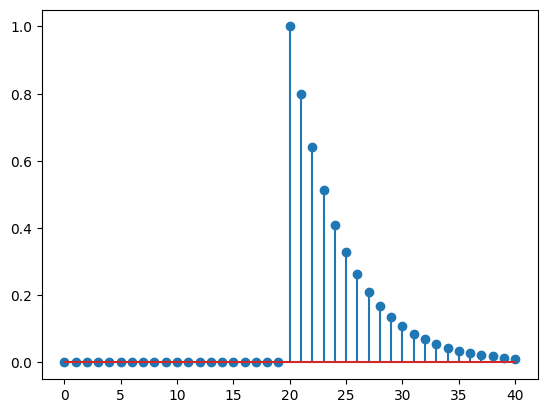

In [5]:
for i, j in enumerate(n2):
    if j >= k3:
        h[i] = sig1[i]
plt.stem(h)

Esto entrega el siguiente resultado:

<StemContainer object of 3 artists>

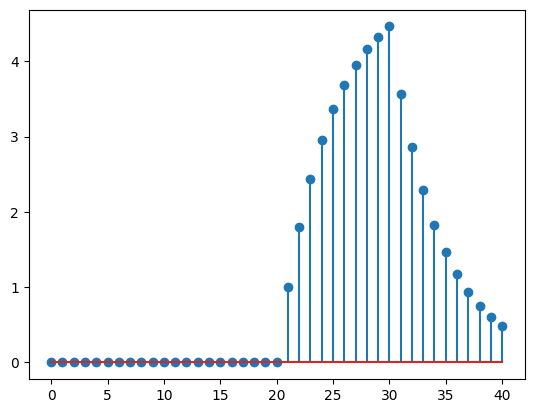

In [6]:
y = Convolucion(x,h)
plt.stem(y)

Por el otro lado, invirtiendo las variables "x" y "h", podemos observar lo siguiente:

<StemContainer object of 3 artists>

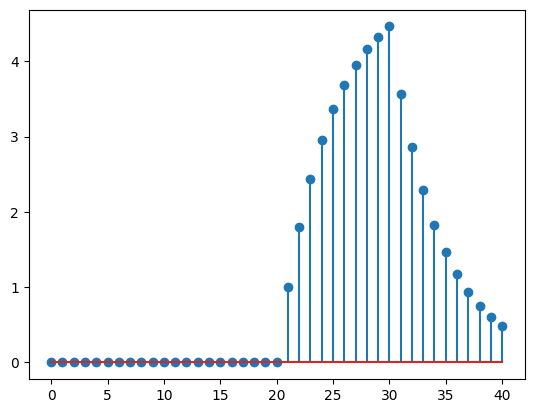

In [7]:
y = Convolucion(h,x)
plt.stem(y)

Lo que demuestra la conmutatividad de la Convolución.

Finalmente, se genera una animación para observar a grandes rasgos el proceso de como es formada la función.

<IPython.core.display.Javascript object>


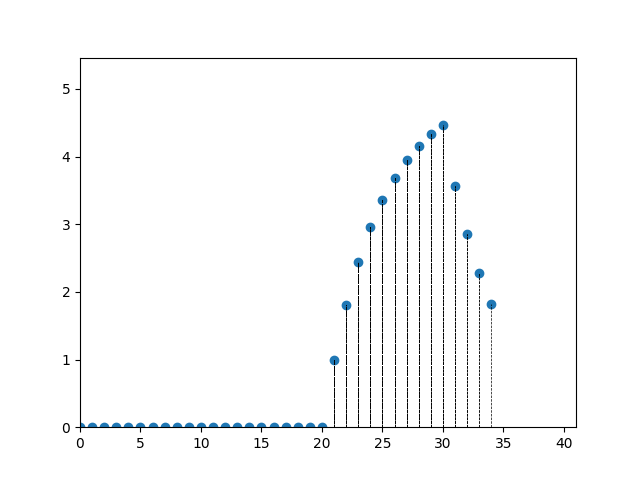

In [8]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.set_xlim(0, len(y))
ax.set_ylim(0, np.max(y)+1)
line, = ax.plot([], [], 'o')

def update(frame):
    for i in range(frame+1):
        ax.vlines(i, 0, y[i], colors = 'black', linestyles='dashed', linewidth=0.5)
    line.set_data(np.arange(frame+1), y[:frame+1])
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval = 200)

plt.show()

## Conclusión:
Debido a las limitaciones de tiempo, no fue posible generar una animación con un mayor detalle de el solapamiento de ambas funciones al momento de generar la tercera función. Es menester investigar en mayor detalle las funciones de animación de PyPlot para asi poder entregar resultados mas satisfactorios.
Finalmente, la generación del codigo matemático debe ser eventualmente desarmado para así poder apreciar de mejor forma el como actua la función "Convolución" a lo largo del tiempo, e idealmente también, haciendo pruebas con otros tipos de forma de onda.